In [20]:
from sklearn import cluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from os import path
path = '/content/drive/MyDrive/CSV/CountryClusters.csv'
df = pd.read_csv(path)



In [22]:
df.describe()


,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


In [23]:
df


,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [24]:
#proses cluster
x = df.iloc[:,1:3]

In [25]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

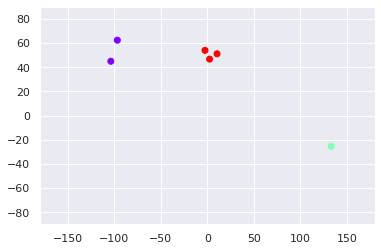

In [26]:
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [27]:
from os import path
path = '/content/drive/MyDrive/CSV/marketSegementation.csv'
df2 = pd.read_csv(path)

In [28]:
df2.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


In [29]:
df2


,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [30]:
x = df2.copy()

Text(0, 0.5, 'Loyalty')

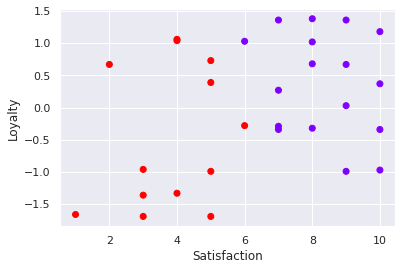

In [31]:
kmeans =KMeans(2)
kmeans.fit(x)
clusters = x.copy()
clusters['Clusters_pred'] =kmeans.fit_predict(x)
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['Clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')


Text(0, 0.5, 'WCSS')

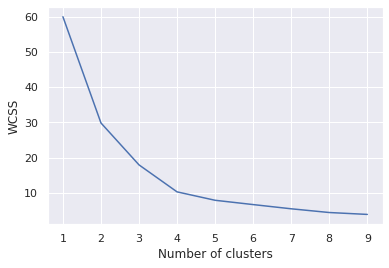

In [32]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

wcss =[]
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel ('WCSS')

Text(0, 0.5, 'Loyalty')

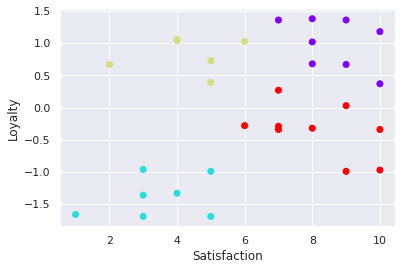

In [34]:
#new Clustering
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Clusters_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['Clusters_pred'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')